In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_csv("/content/smartphone_cleaned_v5.csv")

In [ ]:
df.head()

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   
3           False      snapdragon        8.0              2.2   
4           False       dimensity        8.0              2.6   

   battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
0            5000.0                        1          100.0          12.0   
1            5000.0                        1           33.0           6.0   
2            5000.0                        1           15.0           4.0   
3            5000.0                        1            NaN           6.0   
4            5000.0                        1           67.0           6.0   

   internal_memory  screen_size  refresh_rate    resolution  num_rear_cameras  \
0            256.0         6.70           120  1440 x 3216                  3   
1            128.0         6.59           120  1080 x 2412                  3   
2             64.0         6.60            90  1080 x 2408                  3   
3            128.0         6.55           120  1080 x 2400                  3   
4            128.0         6.70           120  1080 x 2412                  3   

   num_front_cameras       os  primary_camera_rear  primary_camera_front  \
0                1.0  android                 50.0                  16.0   
1                1.0  android                 64.0                  16.0   
2                1.0  android                 50.0                  13.0   
3                1.0  android                 50.0                  16.0   
4                1.0  android                108.0                  16.0   

   extended_memory_available  extended_upto  
0                          0            NaN  
1                          1         1024.0  
2                          1         1024.0  
3                          1         1024.0  
4                          0            NaN

In [ ]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

<ipython-input-127-d7dbcdc4e35d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

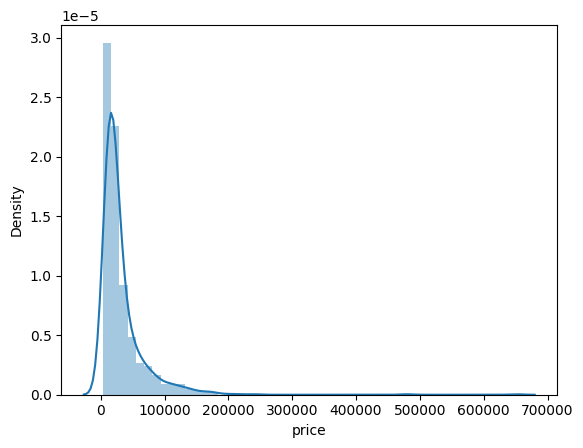

In [ ]:
sns.distplot(df["price"])

<Axes: xlabel='price'>

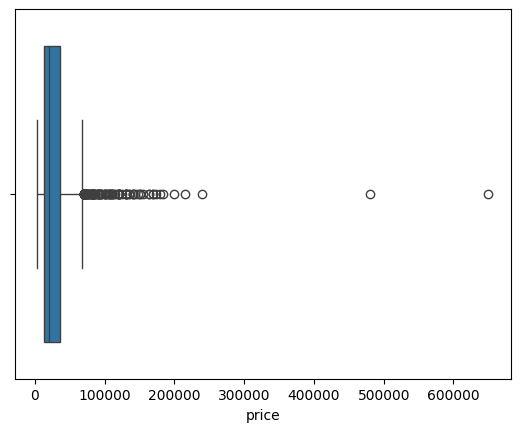

In [ ]:
sns.boxplot(x=df["price"])

In [ ]:
#calculate iqr
q1=df["price"].quantile(.25)
q3=df["price"].quantile(.75)
iqr=q3-q1
#define bound for outlier
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
#identify outlier
outlier=df[(df["price"]<lower_bound )| (df["price"]>upper_bound)]
num_outliers=outlier.shape[0]
outlier_price_stats = outlier["price"].describe()
num_outliers,outlier_price_stats

(107,
 count       107.000000
 mean     114369.308411
 std       72579.711895
 min       69990.000000
 25%       79345.000000
 50%       94990.000000
 75%      127445.000000
 max      650000.000000
 Name: price, dtype: float64)

In [ ]:
outlier.sort_values("price",ascending=False,).head(20)
# there are geniune outlier

brand_name                                     model   price  rating  \
427      vertu                     Vertu Signature Touch  650000    62.0   
887     xiaomi    Xiaomi Redmi K20 Pro Signature Edition  480000    88.0   
478     huawei          Huawei Mate 50 RS Porsche Design  239999    81.0   
951     huawei          Huawei Mate 30 RS Porsche Design  214990     NaN   
458     xiaomi                       Xiaomi Mi Mix Alpha  199990     NaN   
288      apple             Apple iPhone 14 Pro Max (1TB)  182999    78.0   
756      apple             Apple iPhone 13 Pro Max (1TB)  179900    86.0   
789      apple                 Apple iPhone 14 Pro (1TB)  172999    77.0   
739      apple           Apple iPhone 14 Pro Max (512GB)  169900    78.0   
954     huawei                             Huawei Mate X  169000     NaN   
905    samsung  Samsung Galaxy Z Fold 4 (12GB RAM + 1TB)  163980     NaN   
704     huawei                          Huawei Mate Xs 2  162990    89.0   
319    samsung                   Samsung Galaxy Z Fold 4  154998     NaN   
861     royole                       Royole FlexPai 3 5G  149999    87.0   
398      apple                     Apple iPhone 15 Ultra  149900    79.0   
923      apple                 Apple iPhone 13 Pro (1TB)  147900    84.0   
152      apple                   Apple iPhone 15 Pro Max  142990    79.0   
209      apple           Apple iPhone 14 Pro Max (256GB)  139990    77.0   
682      apple           Apple iPhone 13 Pro Max (256GB)  139900    84.0   
613      apple               Apple iPhone 12 Pro (512GB)  139900    80.0   

     has_5g  has_nfc  has_ir_blaster processor_brand  num_cores  \
427   False     True           False      snapdragon        8.0   
887   False     True           False      snapdragon        8.0   
478   False     True            True      snapdragon        8.0   
951    True     True            True           kirin        8.0   
458    True    False           False      snapdragon        8.0   
288    True     True           False          bionic        6.0   
756    True     True           False          bionic        6.0   
789    True     True           False          bionic        6.0   
739    True     True           False          bionic        6.0   
954    True     True            True           kirin        8.0   
905    True     True           False      snapdragon        8.0   
704   False     True            True      snapdragon        8.0   
319    True     True           False      snapdragon        8.0   
861    True    False           False      snapdragon        8.0   
398    True     True           False          bionic        8.0   
923    True     True           False          bionic        6.0   
152    True     True           False          bionic        NaN   
209    True     True           False          bionic        6.0   
682    True     True           False          bionic        6.0   
613    True     True           False          bionic        6.0   

     processor_speed  battery_capacity  fast_charging_available  \
427             1.50            2275.0                        0   
887             2.80            4000.0                        1   
478             3.20            4700.0                        1   
951             2.86            4500.0                        1   
458             2.96            4050.0                        1   
288              NaN            4323.0                        1   
756             3.22            4352.0                        1   
789              NaN            3200.0                        1   
739              NaN            4323.0                        1   
954             2.86            4500.0                        1   
905             3.20            4400.0                        1   
704             2.84            4600.0                        1   
319             3.20            4400.0                        1   
861             2.84            3360.0                       

<ipython-input-131-893f652b41a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["rating"])


<Axes: xlabel='rating', ylabel='Density'>

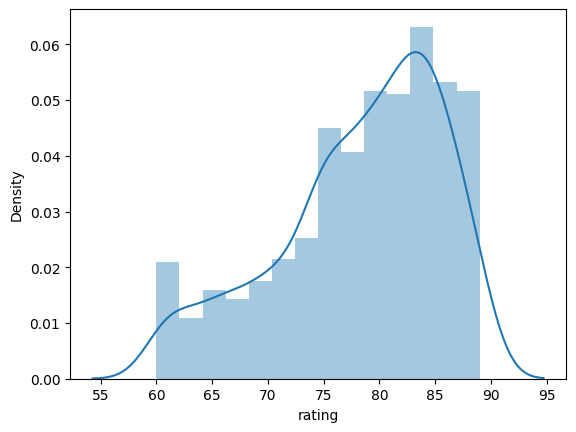

In [ ]:
sns.distplot(df["rating"])

<Axes: ylabel='rating'>

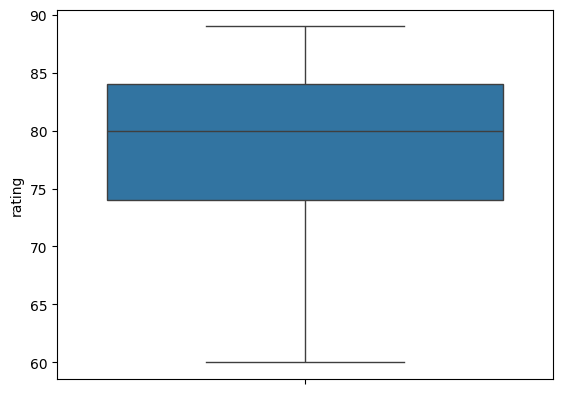

In [ ]:
sns.boxplot(df["rating"])

<ipython-input-133-f9c695c15626>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["num_cores"])


<Axes: xlabel='num_cores', ylabel='Density'>

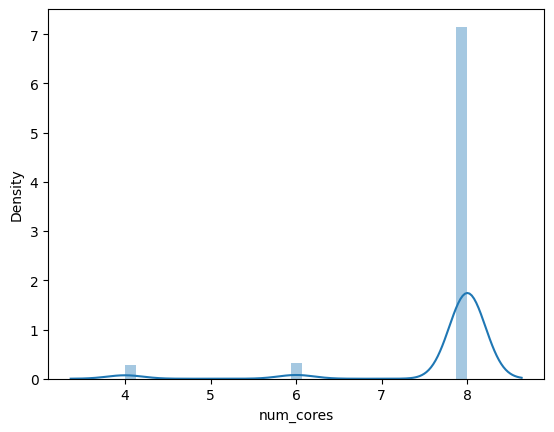

In [ ]:
sns.distplot(df["num_cores"])

<Axes: xlabel='num_cores'>

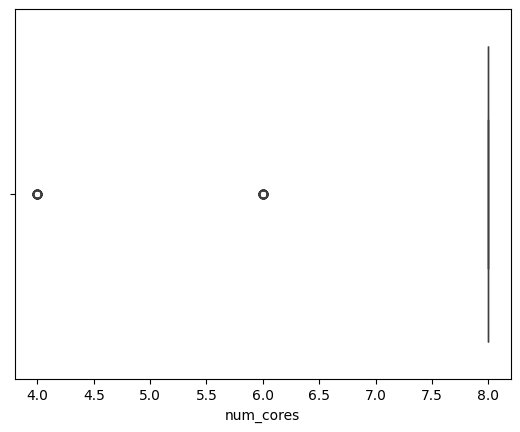

In [ ]:
sns.boxplot(x=df["num_cores"])

In [ ]:
df["num_cores"].describe()

count    974.000000
mean       7.772074
std        0.836845
min        4.000000
25%        8.000000
50%        8.000000
75%        8.000000
max        8.000000
Name: num_cores, dtype: float64

<ipython-input-136-6eb1372aea42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["processor_speed"])


<Axes: xlabel='processor_speed', ylabel='Density'>

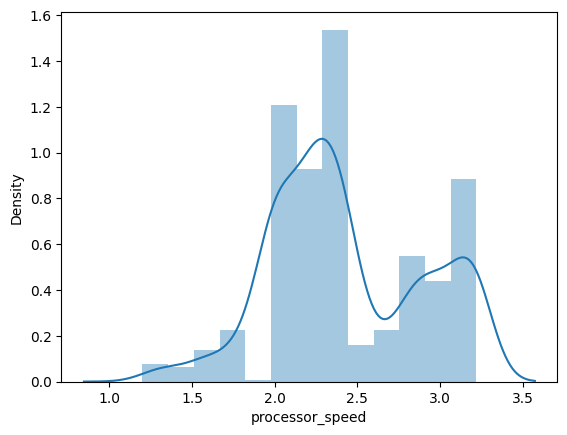

In [ ]:
sns.distplot(df["processor_speed"])

<Axes: xlabel='processor_speed'>

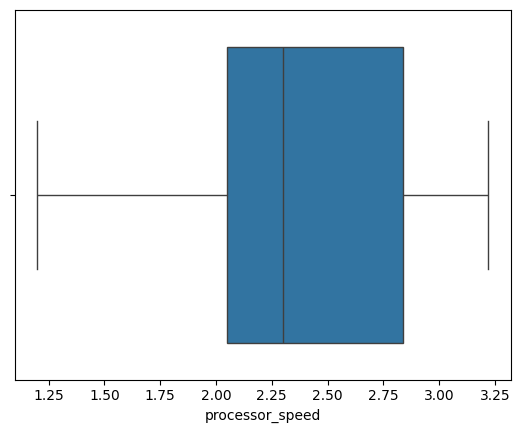

In [ ]:
sns.boxplot(x=df["processor_speed"])

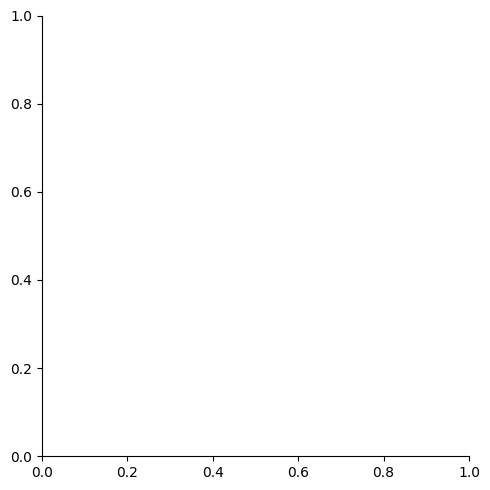

In [ ]:
sns.displot([])

In [ ]:
numerical_columns = df.select_dtypes(include=["int", "float"]).columns

<ipython-input-140-e6c602378f72>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-140-e6c602378f72>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-140-e6c602378f72>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

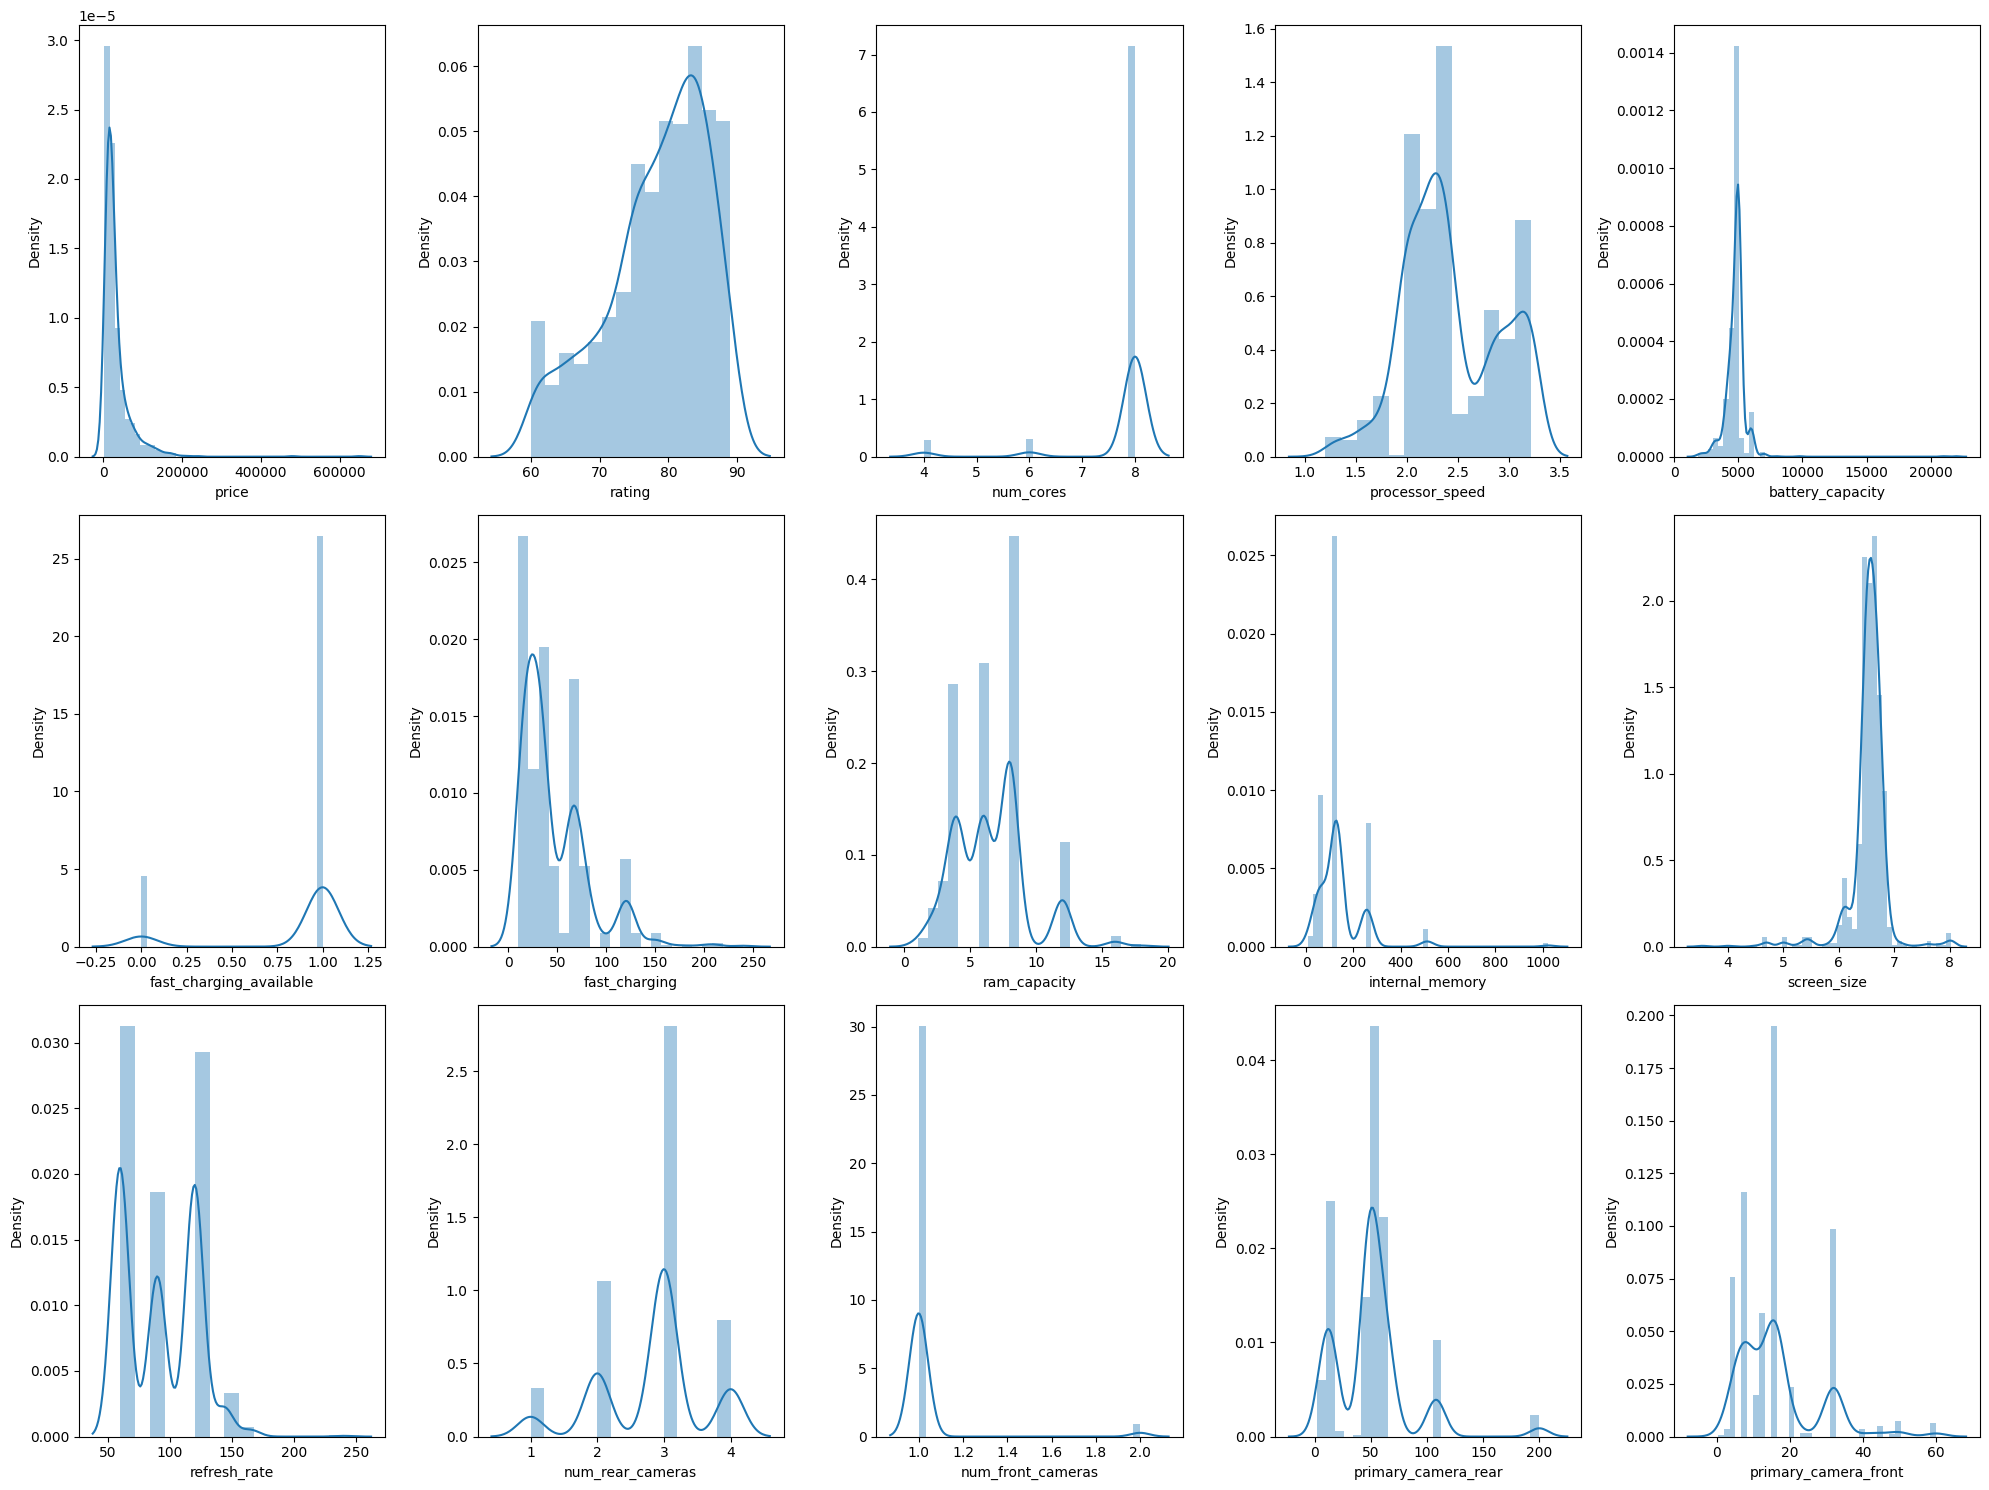

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1


for col in numerical_columns:
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber += 1

plt.tight_layout()
plt.show()

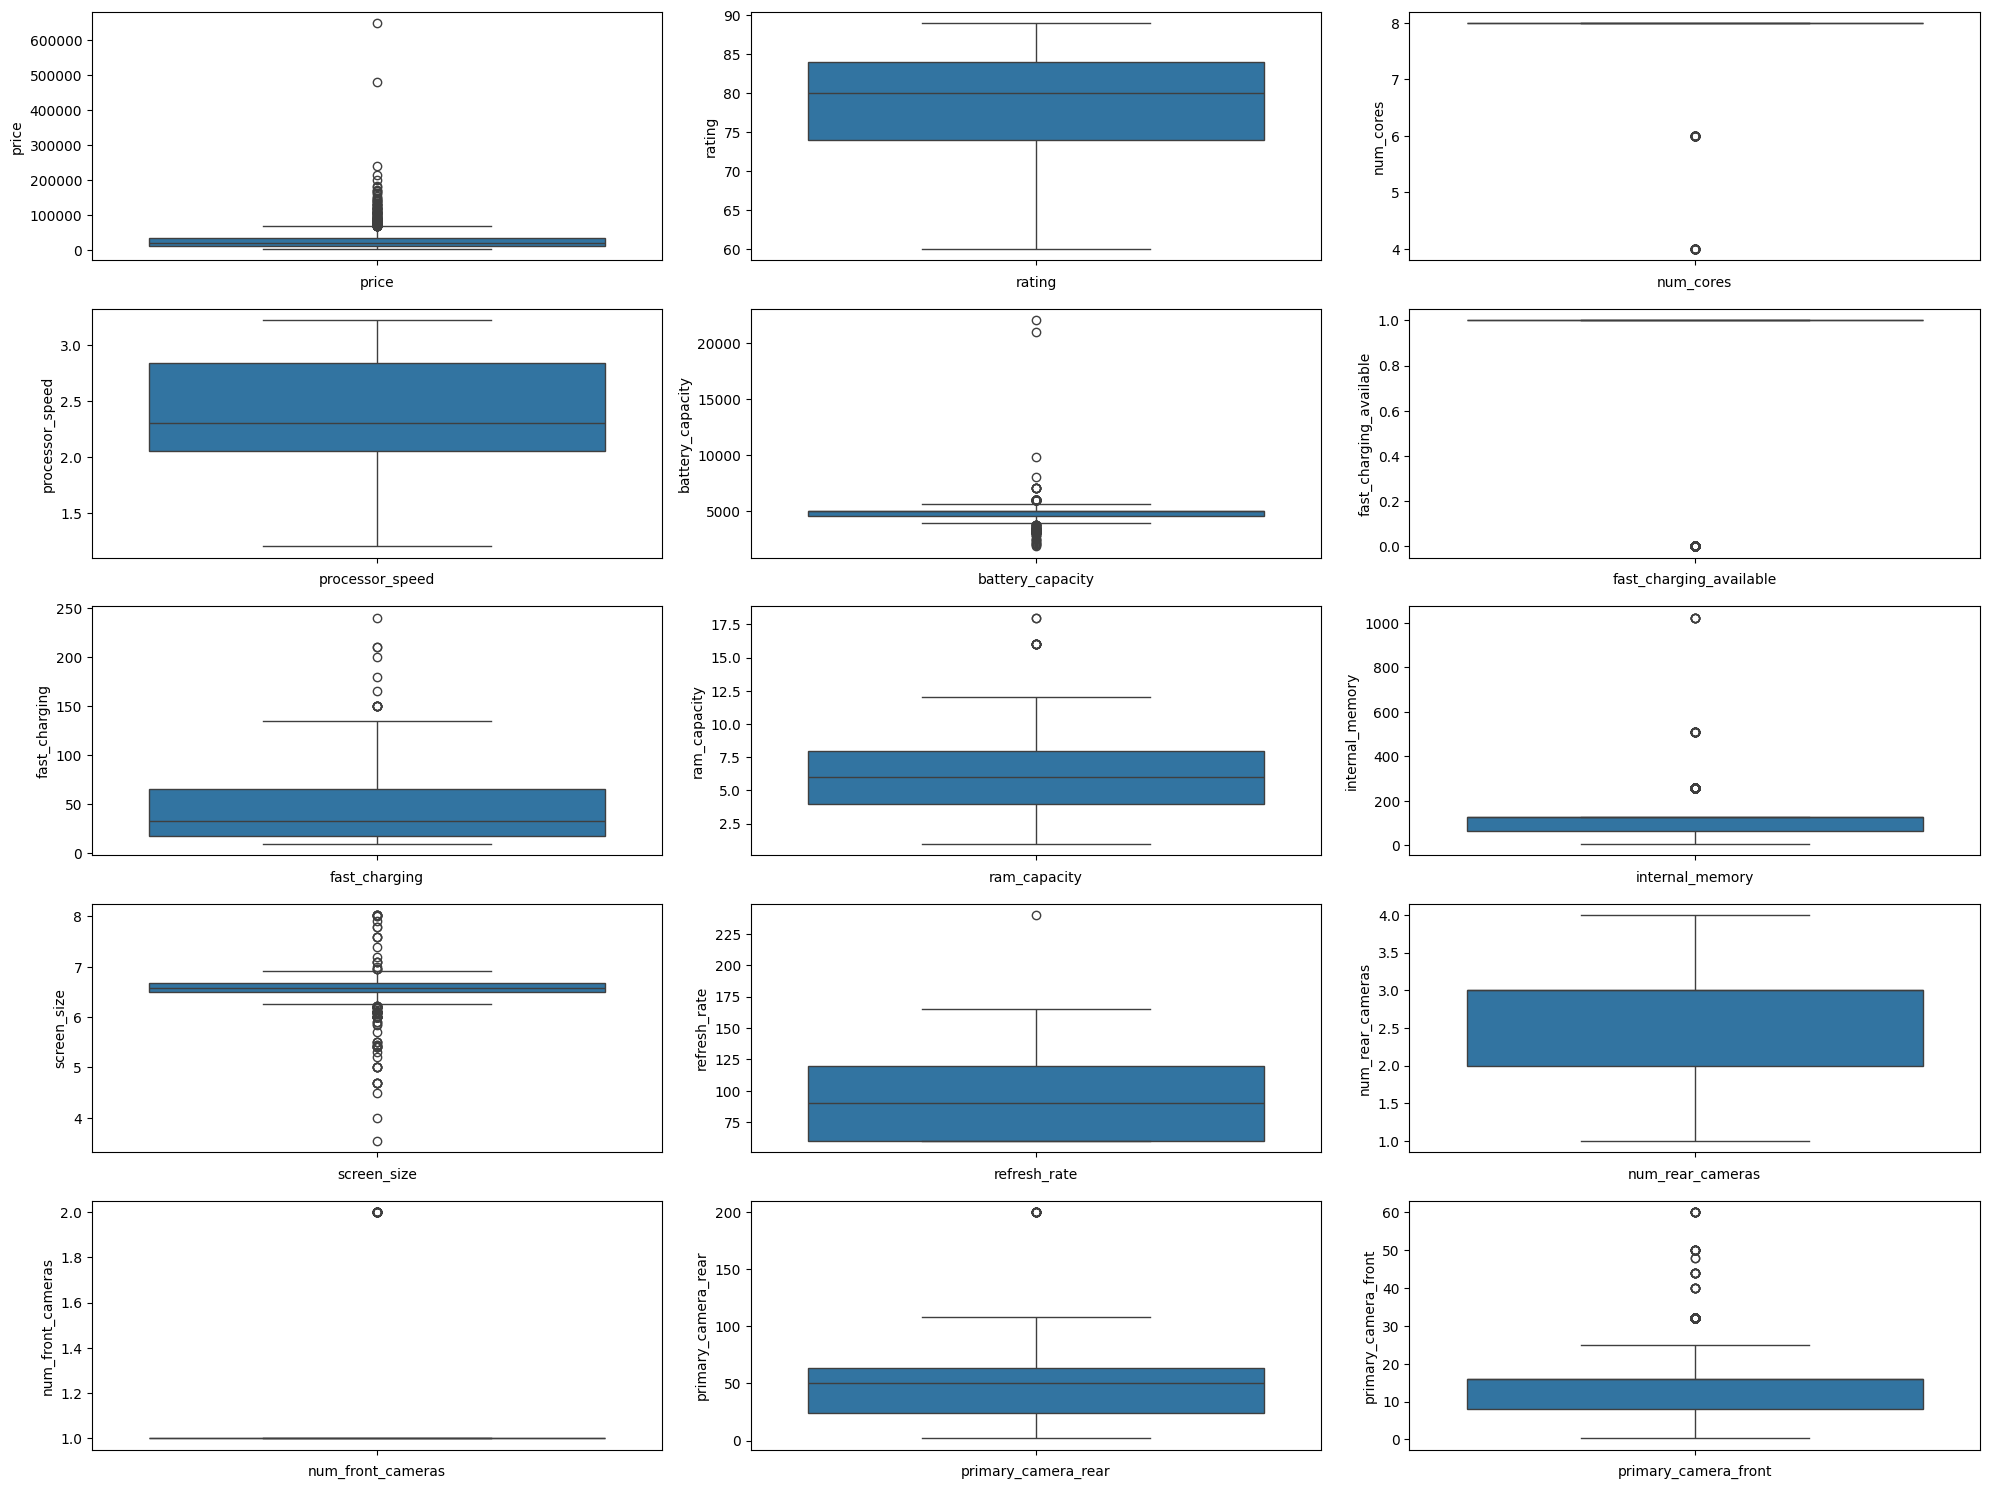

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1


for col in numerical_columns:
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
df[df["internal_memory"]> 200]

brand_name                                              model   price  \
0      oneplus                                      OnePlus 11 5G   54999   
7       xiaomi                      Xiaomi Redmi Note 12 Pro Plus   29999   
14     samsung                        Samsung Galaxy S23 Ultra 5G  114990   
17        oppo                               OPPO Reno 9 Pro Plus   45999   
24        vivo                                       Vivo V26 Pro   42990   
32        vivo                                           Vivo V27   27990   
36        oppo                                       Oppo Reno 8T   29990   
37     samsung                        Samsung Galaxy S22 Ultra 5G   91999   
39        oppo                                     OPPO Reno 9 5G   28499   
43      realme               Realme 10 Pro Plus (8GB RAM + 256GB)   27999   
58     samsung                            Samsung Galaxy S23 Plus   84990   
65        vivo                                       Vivo S16 Pro   35499   
67      xiaomi   Xiaomi Redmi Note 12 Pro Plus (12GB RAM + 256GB)   32999   
69        oppo                                   Oppo Find N Fold   99990   
71        vivo                     Vivo V23 5G (12GB RAM + 256GB)   27994   
93        vivo                               Vivo X90 Pro Plus 5G   73999   
97        iqoo                                         iQOO 11 5G   59999   
98        vivo                                     Vivo X Fold 5G  106990   
106       vivo                                       Vivo V27 Pro   43999   
109    oneplus                  OnePlus 10R 5G (12GB RAM + 256GB)   36999   
110      tecno                                   Tecno Phantom X2   39999   
118      tesla                                     Tesla Pi Phone   69999   
121    oneplus                 OnePlus Nord 2T (12GB RAM + 256GB)   33900   
127    oneplus        OnePlus Nord CE 2 Lite 5G (8GB RAM + 256GB)   24999   
133    nothing                  Nothing Phone 1 (8GB RAM + 256GB)   28249   
135     xiaomi  Xiaomi Redmi Note 11 Pro Plus 5G (8GB RAM + 25...   22999   
141       oppo                                 OPPO Reno 9 Pro 5G   39999   
152      apple                            Apple iPhone 15 Pro Max  142990   
154    infinix                               Infinix Zero 5G 2023   19499   
158       oppo                                    Oppo Find N2 5G   94990   
162       oppo                              Oppo Reno 10 Pro Plus   58990   
178       vivo                        Vivo V25 (12GB RAM + 256GB)   31999   
180    infinix                                 Infinix Zero Ultra   36999   
192      nokia                                       Nokia N73 5G   46999   
195       oppo            OPPO Reno 8 Pro House of Dragon Edition   45999   
202     xiaomi                                 Xiaomi 13 Ultra 5G   71999   
205    nothing                 Nothing Phone 1 (12GB RAM + 256GB)   35999   
208     xiaomi         Xiaomi Redmi Note 12 Pro (8GB RAM + 256GB)   27994   
209      apple                    Apple iPhone 14 Pro Max (256GB)  139990   
210       vivo                    Vivo V25 Pro (12GB RAM + 256GB)   39999   
214      honor                                          Honor X9a   27999   
228       oppo                                 OPPO Reno 8 Pro 5G   45999   
229    oneplus               OnePlus 10 Pro 5G (12GB RAM + 256GB)   65499   
230       iqoo                                     iQOO 11 Pro 5G   58990   
235     xiaomi                               Xiaomi Mix Fold 2 5G  106990   
237       oppo                                      OPPO Reno 8 Z   26990   
239     xiaomi                      Xiaomi Redmi Note 12 Explorer   24999   
246      apple                            Apple iPhone 14 (256GB)   75999   
247   motorola                                  Motorola Moto G73   25999   
250      tecno                               Tecno Phantom X2 Pro   49999   
263    samsung               Samsung Galaxy A53 (8GB RAM + 256GB)   36499   


In [ ]:
df[df["fast_charging_available"]==0]

brand_name                                   model   price  rating  \
33       apple                         Apple iPhone 11   38999    73.0   
47      realme                              Realme C33    8950    64.0   
70        oppo                               OPPO A17K    9499    62.0   
75      gionee                          Gionee G13 Pro    6190     NaN   
79      xiaomi       Xiaomi Redmi 10A (4GB RAM + 64GB)    8388    66.0   
94      realme             Realme C33 (4GB RAM + 64GB)    9999    67.0   
111      apple                         Apple iPhone 12   51999    74.0   
132   motorola                       Motorola Moto E40    7999    71.0   
136      apple                 Apple iPhone 11 (128GB)   46999    75.0   
143        jio                             Jio Phone 3    4499     NaN   
149      apple                    Apple iPhone 12 Mini   40999    74.0   
155     realme                              Realme C30    5299     NaN   
169       letv                             Letv Y1 Pro    5499     NaN   
187      ikall                           iKall Z19 Pro    8099    60.0   
189     realme                              Realme C2s    3499    63.0   
190     duoqin                          Duoqin F22 Pro    9990     NaN   
213       lava                           Lava Blaze 5G   10999    73.0   
218    samsung                     Samsung Galaxy A04e    9299    65.0   
225       poco               POCO C31 (4GB RAM + 64GB)    7499    68.0   
261       poco                                POCO C31    6499    65.0   
277     realme             Realme C31 (4GB RAM + 64GB)    8999    65.0   
292     realme        Realme C11 2021 (4GB RAM + 64GB)    7749    61.0   
297     xiaomi                        Xiaomi Redmi 10A    7499    64.0   
300     realme             Realme C30 (3GB RAM + 32GB)    6299    60.0   
301   motorola                    Motorola Moto G51 5G   12999    77.0   
305      apple                 Apple iPhone 12 (128GB)   55999    75.0   
313       itel                            itel S16 Pro    6990     NaN   
320     royole                        Royole FlexPai 2  109999    87.0   
323      tecno                           Tecno Spark 9    8999    69.0   
335    samsung                 Samsung Galaxy A03 Core    6499     NaN   
339     xiaomi                    Xiaomi Redmi 9 Activ    7499    68.0   
350        jio                       Jio JioPhone Next    4649     NaN   
351       vivo                                Vivo Y93   18000    62.0   
356     xiaomi                  Xiaomi Redmi 10A Sport    9999    69.0   
361      apple            Apple iPhone 12 Mini (128GB)   45999    75.0   
365      tecno          Tecno Spark 9 (4GB RAM + 64GB)    7999    65.0   
380       letv                             Letv Y2 Pro    6999     NaN   
381      tecno         Tecno Spark 8C (4GB RAM + 64GB)    8890    63.0   
396       itel                                itel P36    6490     NaN   
414     xiaomi      Xiaomi Redmi 10A (6GB RAM + 128GB)   10850    70.0   
427      vertu                   Vertu Signature Touch  650000    62.0   
432       oppo                               OPPO A16e    8999    65.0   
435      apple                  Apple iPhone SE 3 2022   43900     NaN   
438     xiaomi                         Xiaomi Redmi 9A    6999    61.0   
443    infinix                      Infinix Smart 6 HD    6999     NaN   
444      apple                     Apple iPhone 15 Pro  130990    75.0   
451      redmi                               Redmi 12C    7999    70.0   
457    samsung                      Samsung Galaxy F22   11499    73.0   
467     realme                        Realme Narzo 50i    6490     NaN   
472       vivo                                Vivo Y25    7499     NaN   
473        lyf                             Lyf Earth 1    3990    60.0   
475      tecno                         Tecno Pop 6 Pro    6299     NaN   
476       itel                            Itel A24 Pro    5990     NaN   
496     

In [ ]:
df[df["fast_charging"]>=150]

brand_name                                   model  price  rating  has_5g  \
38      xiaomi         Xiaomi Redmi Note 12 Pro Max 5G  32999    83.0    True   
73     oneplus                             OnePlus 10T  44999    85.0    True   
180    infinix                      Infinix Zero Ultra  36999    89.0    True   
230       iqoo                          iQOO 11 Pro 5G  58990    89.0    True   
306    oneplus          OnePlus 10T (16GB RAM + 256GB)  55999    87.0    True   
364    oneplus          OnePlus 10T (12GB RAM + 256GB)  50999    87.0    True   
397     realme                         Realme GT Neo 5  34999    83.0    True   
510    oneplus                          OnePlus 12 Pro  69999     NaN    True   
511     xiaomi  Xiaomi Redmi Note 12 Discovery Edition  26990    86.0    True   
559      nubia              Nubia Red Magic 8 Pro Plus  60999    86.0    True   
857    oneplus                          OnePlus Ace 5G  28990    84.0    True   
908    oneplus                         OnePlus Ace Pro  47990    86.0    True   
913       poco                           POCO F5 GT 5G  42999    86.0    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
38     False            True      snapdragon        8.0             2.36   
73      True           False      snapdragon        8.0             3.20   
180    False           False       dimensity        8.0             2.50   
230     True            True      snapdragon        8.0             3.20   
306     True           False      snapdragon        8.0             3.20   
364     True           False      snapdragon        8.0             3.20   
397     True           False      snapdragon        8.0             3.20   
510     True           False      snapdragon        8.0             3.20   
511     True            True       dimensity        8.0             2.60   
559     True           False      snapdragon        8.0             3.20   
857     True           False       dimensity        8.0             2.85   
908     True           False      snapdragon        8.0             3.20   
913     True            True       dimensity        8.0             3.00   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
38             5200.0                        1          210.0           6.0   
73             4800.0                        1          150.0           8.0   
180            4500.0                        1          180.0           8.0   
230            4700.0                        1          200.0           8.0   
306            4800.0                        1          150.0          16.0   
364            4800.0                        1          150.0          12.0   
397            4600.0                        1          240.0           8.0   
510            4800.0                        1          150.0          12.0   
511            4300.0                        1          210.0           8.0   
559            5000.0                        1          165.0          12.0   
857            4500.0                        1          150.0           8.0   
908            4800.0                        1          150.0          12.0   
913            4500.0                        1          150.0           8.0   

     internal_memory  screen_size  refresh_rate    resolution  \
38             128.0         6.67           120  1080 x 2460    
73             128.0         6.70           120  1080 x 2412    
180            256.0         6.80           120  1080 x 2400    
230            256.0         6.78           144  1440 x 3200    
306            256.0         6.70           120  1080 x 2412    
364            256.0         6.70           120  1080 x 2412    
397            128.0         6.70           120  1080 x 2412    
510            256.0         6.73           144  1440 x 3412    
511            256.0         6.67           120  1080 x 2400    
559            256.0         6.80           120

In [ ]:
(df.isnull().sum()/len(df))*100

brand_name                    0.000000
model                         0.000000
price                         0.000000
rating                       10.306122
has_5g                        0.000000
has_nfc                       0.000000
has_ir_blaster                0.000000
processor_brand               2.040816
num_cores                     0.612245
processor_speed               4.285714
battery_capacity              1.122449
fast_charging_available       0.000000
fast_charging                21.530612
ram_capacity                  0.000000
internal_memory               0.000000
screen_size                   0.000000
refresh_rate                  0.000000
resolution                    0.000000
num_rear_cameras              0.000000
num_front_cameras             0.408163
os                            1.428571
primary_camera_rear           0.000000
primary_camera_front          0.510204
extended_memory_available     0.000000
extended_upto                48.979592
dtype: float64

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

<Axes: >

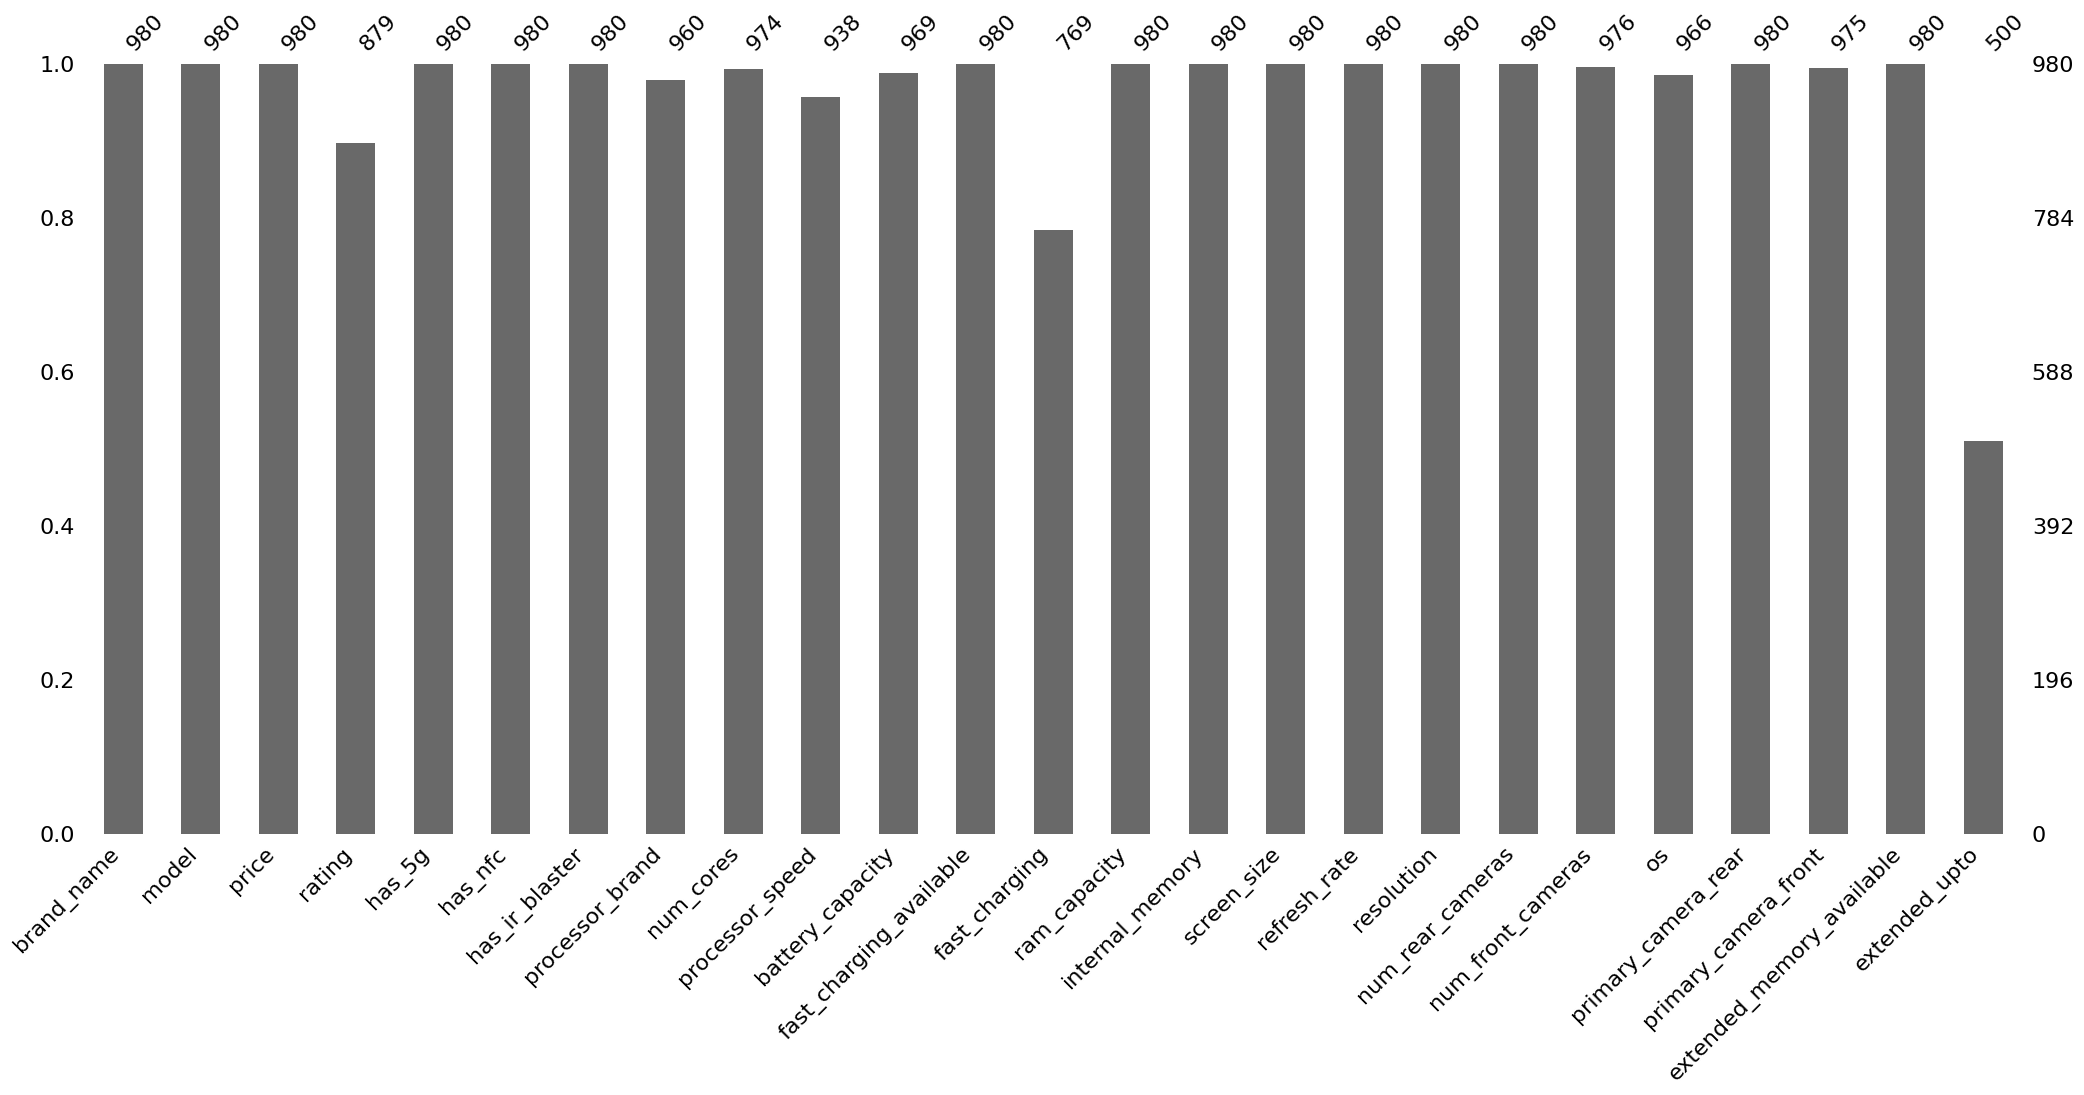

In [ ]:
msno.bar(df)

<Axes: >

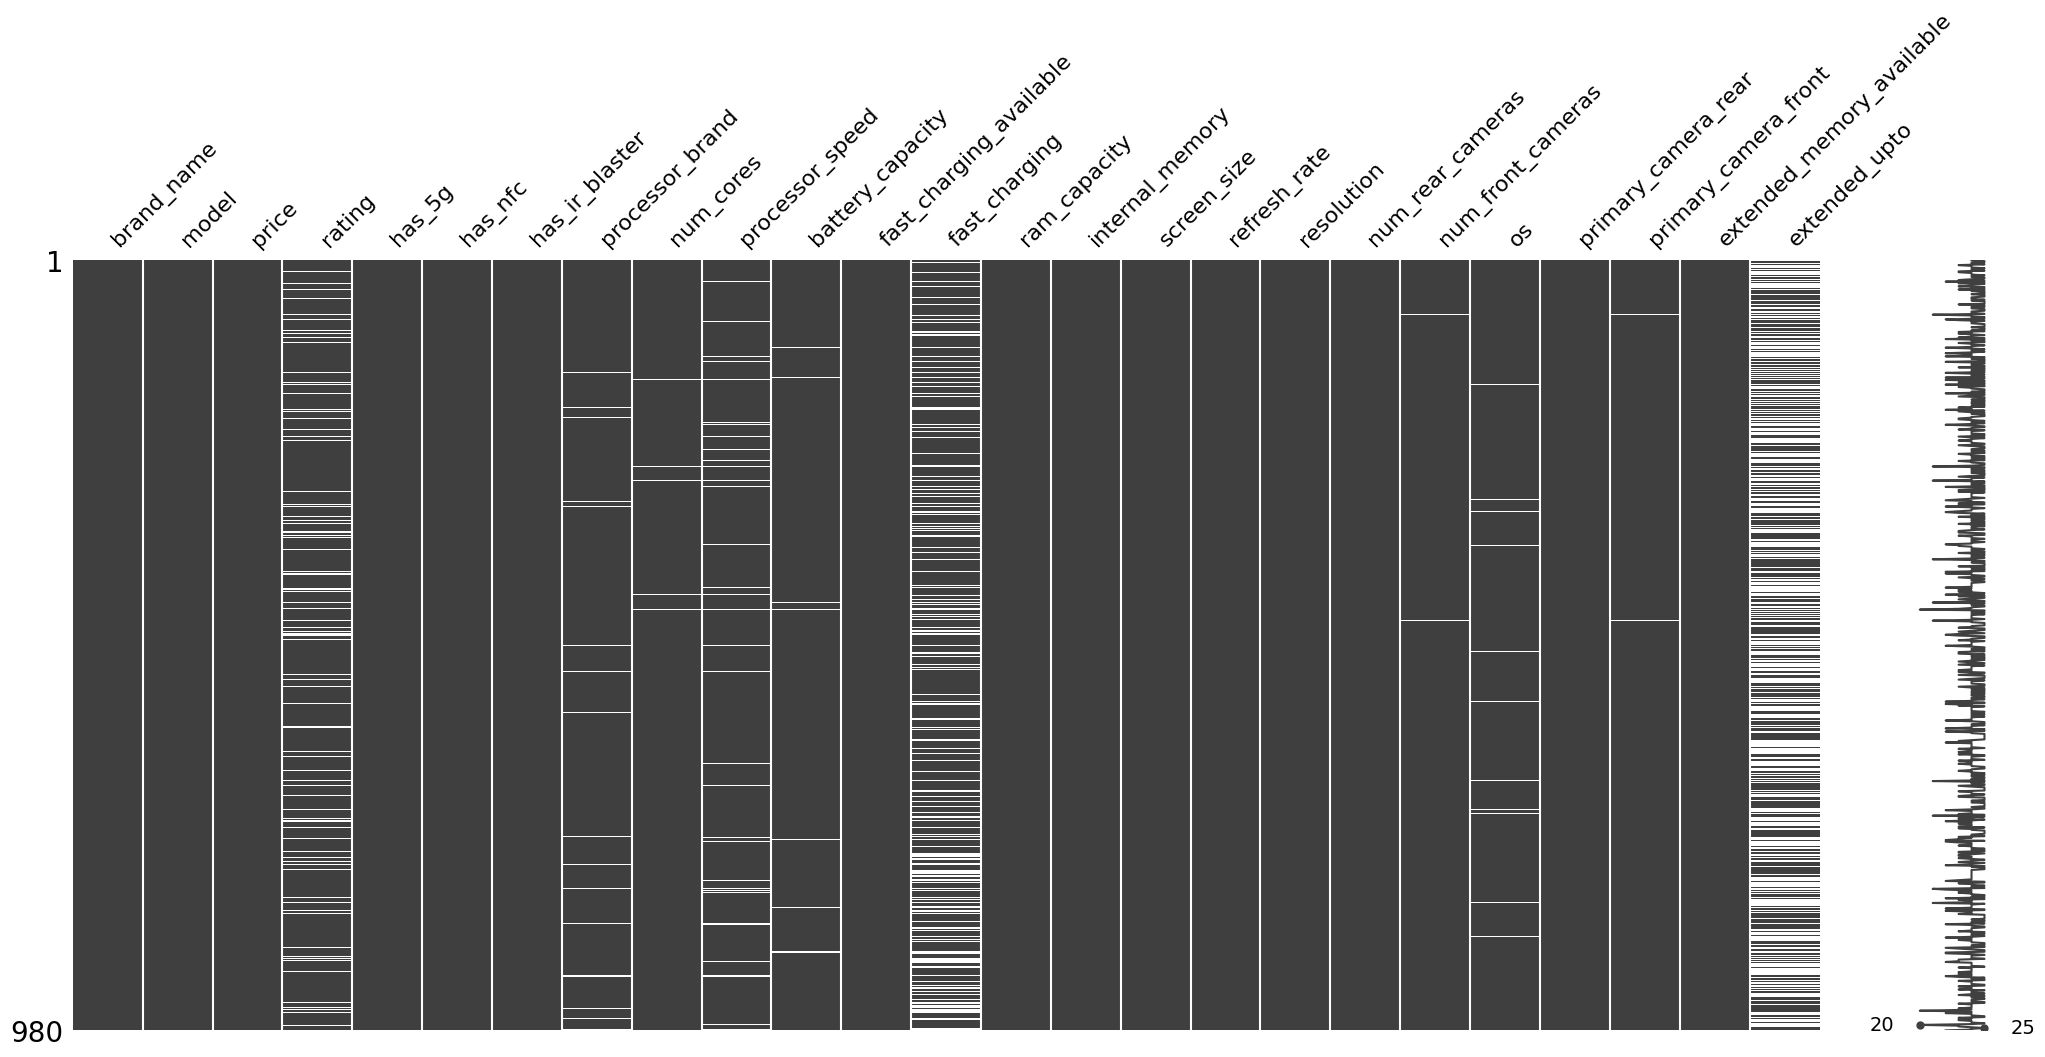

In [ ]:
msno.matrix(df)

<Axes: >

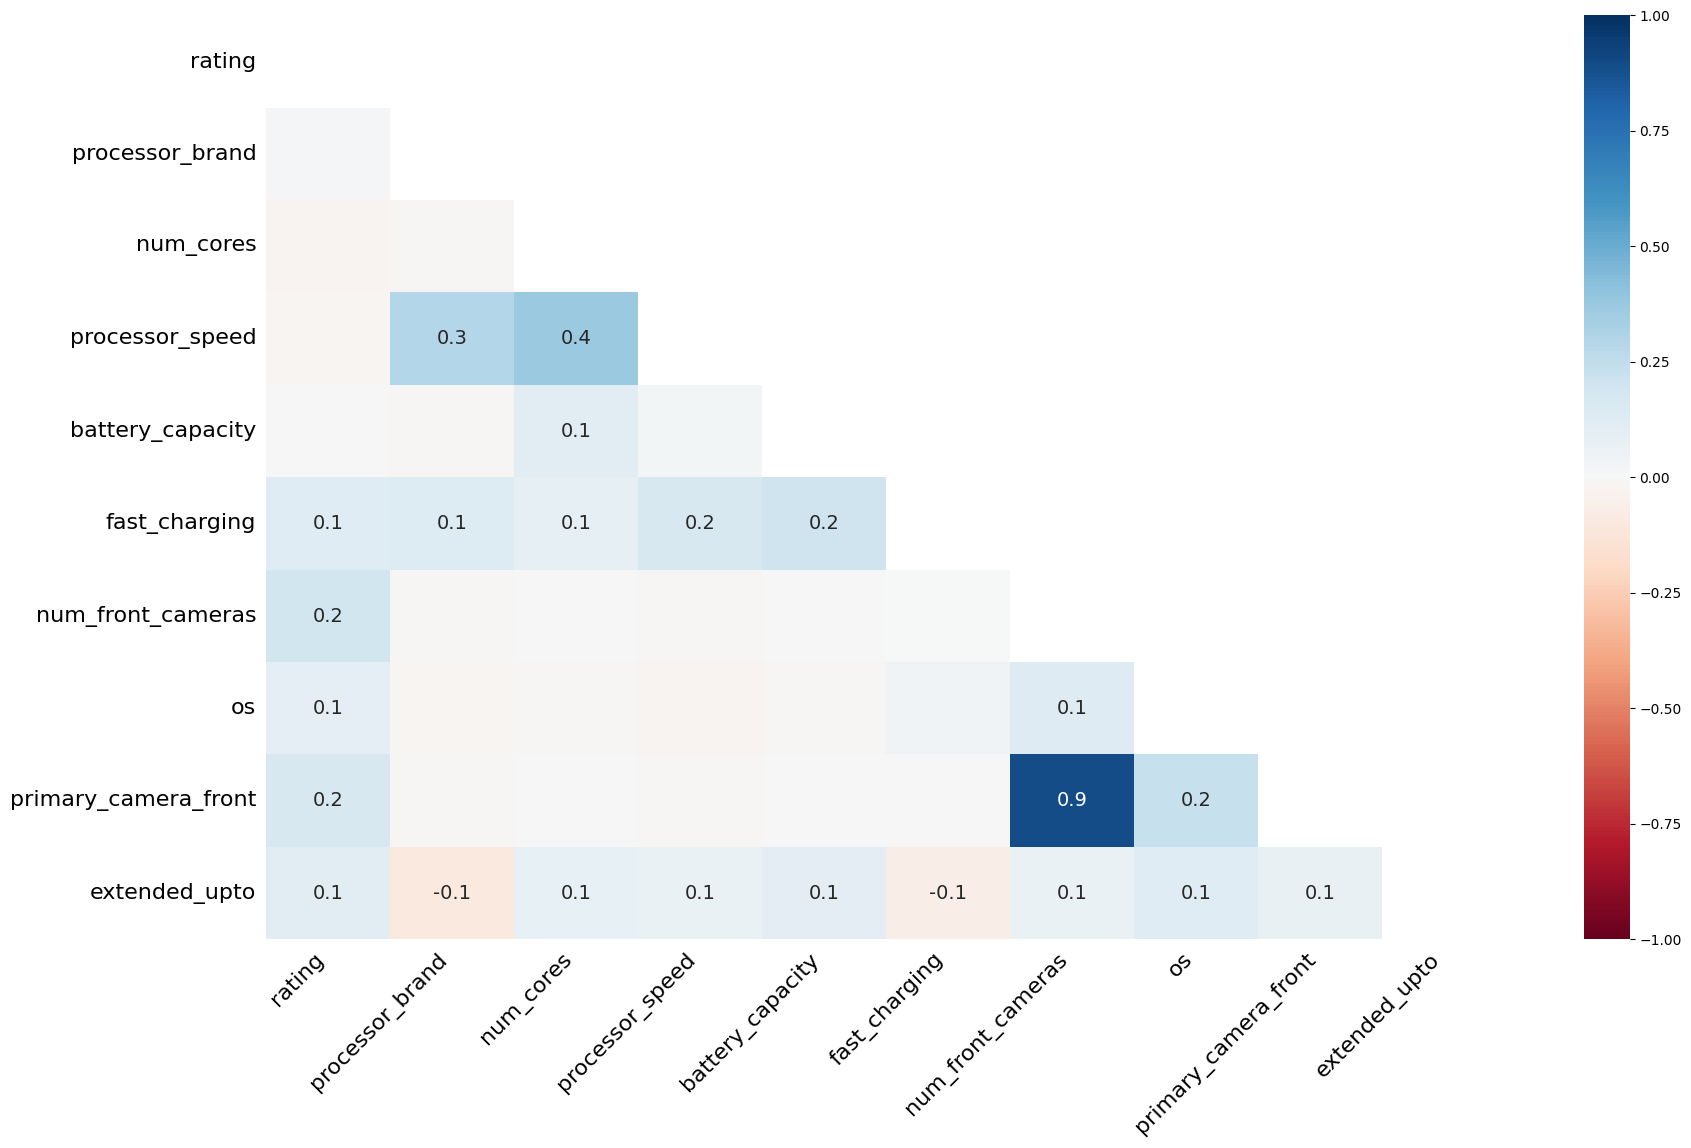

In [ ]:
msno.heatmap(df)

<Axes: >

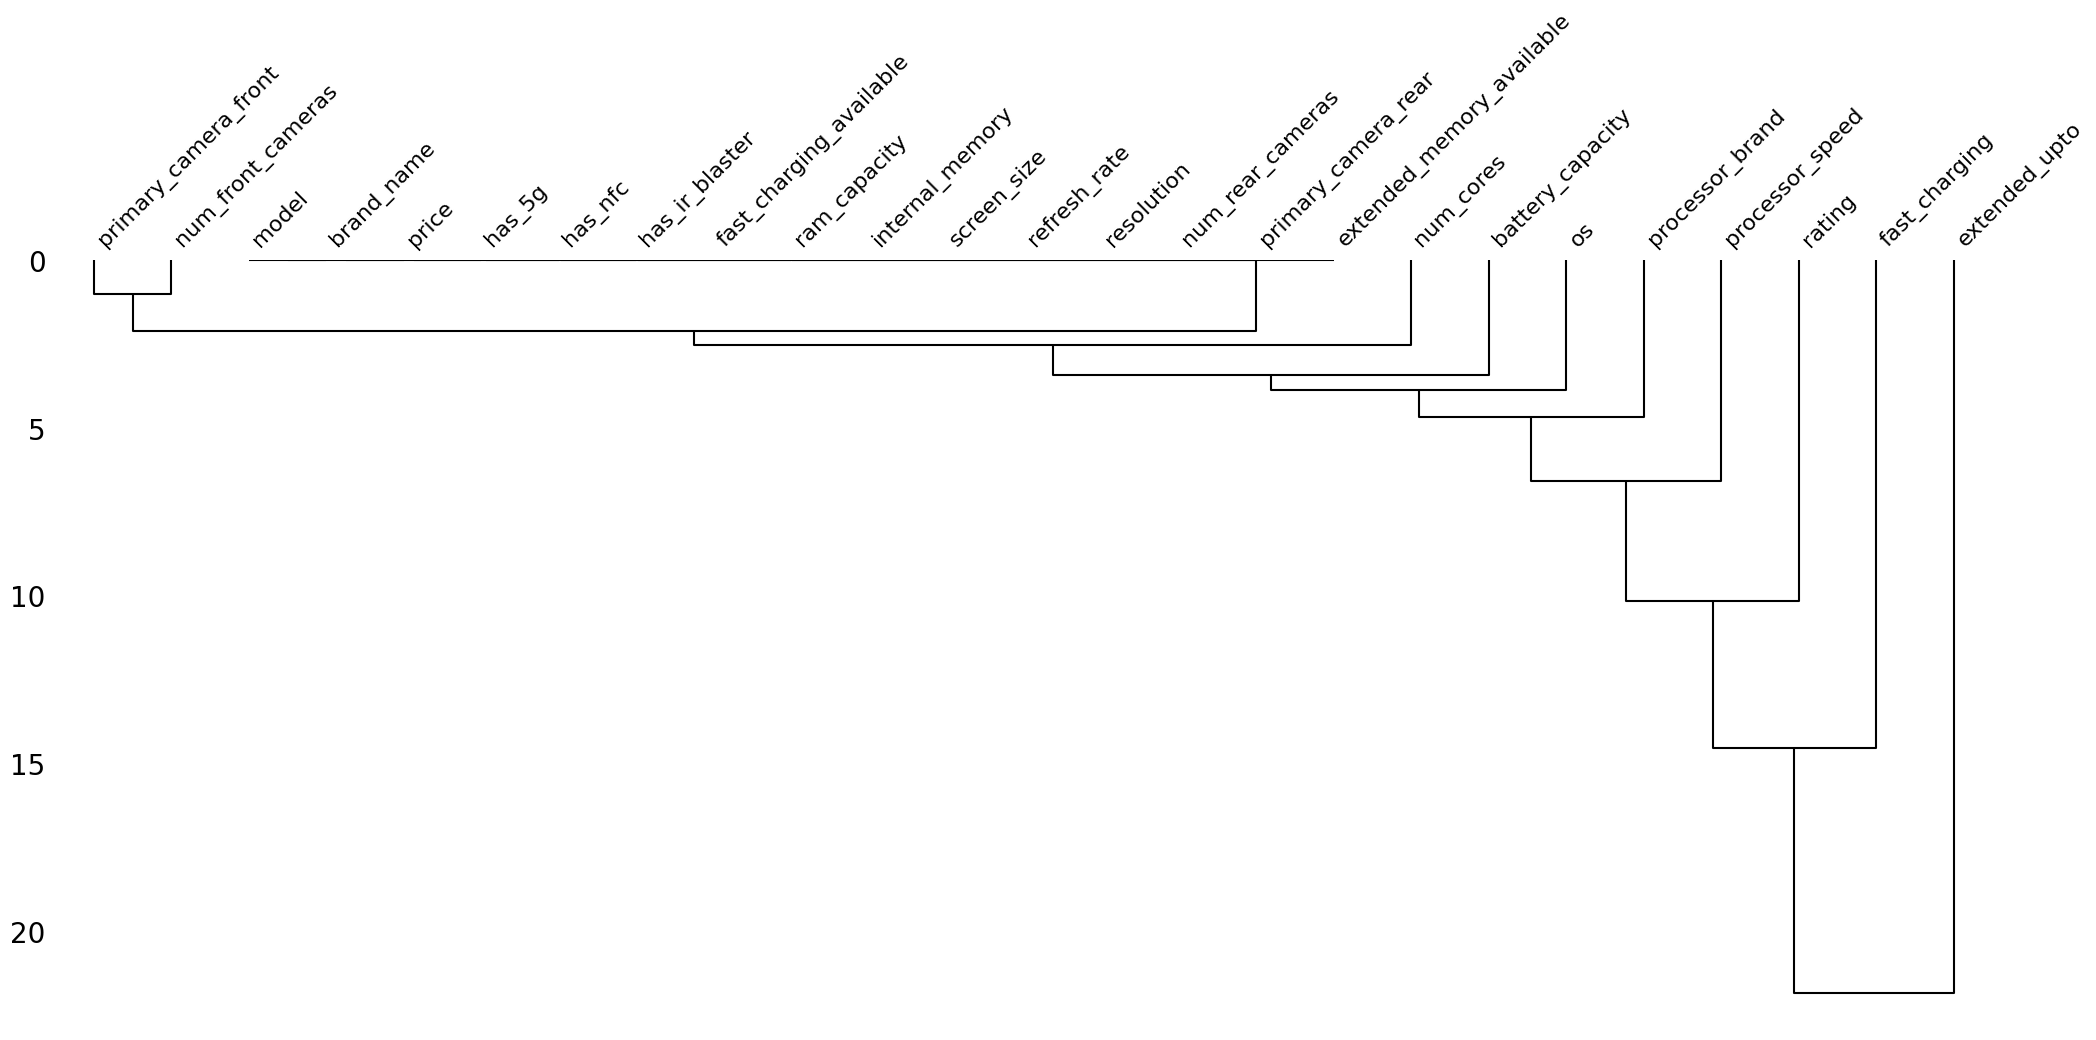

In [ ]:
msno.dendrogram(df)

# idenetify mar

In [ ]:
(df.isnull().sum()/len(df))*100



brand_name                    0.000000
model                         0.000000
price                         0.000000
rating                       10.306122
has_5g                        0.000000
has_nfc                       0.000000
has_ir_blaster                0.000000
processor_brand               2.040816
num_cores                     0.612245
processor_speed               4.285714
battery_capacity              1.122449
fast_charging_available       0.000000
fast_charging                21.530612
ram_capacity                  0.000000
internal_memory               0.000000
screen_size                   0.000000
refresh_rate                  0.000000
resolution                    0.000000
num_rear_cameras              0.000000
num_front_cameras             0.408163
os                            1.428571
primary_camera_rear           0.000000
primary_camera_front          0.510204
extended_memory_available     0.000000
extended_upto                48.979592
dtype: float64

In [ ]:
df = df.dropna(subset=["processor_brand","num_cores","processor_speed","battery_capacity", "num_front_cameras", "os", "primary_camera_front"])

In [ ]:
(df.isnull().sum()/len(df))*100

brand_name                    0.000000
model                         0.000000
price                         0.000000
rating                        9.555556
has_5g                        0.000000
has_nfc                       0.000000
has_ir_blaster                0.000000
processor_brand               0.000000
num_cores                     0.000000
processor_speed               0.000000
battery_capacity              0.000000
fast_charging_available       0.000000
fast_charging                18.333333
ram_capacity                  0.000000
internal_memory               0.000000
screen_size                   0.000000
refresh_rate                  0.000000
resolution                    0.000000
num_rear_cameras              0.000000
num_front_cameras             0.000000
os                            0.000000
primary_camera_rear           0.000000
primary_camera_front          0.000000
extended_memory_available     0.000000
extended_upto                47.333333
dtype: float64

In [ ]:
median_rating = df['rating'].median()
df['rating'].fillna(median_rating, inplace=True)

In [ ]:
(df.isnull().sum()/len(df))*100

brand_name                    0.000000
model                         0.000000
price                         0.000000
rating                        0.000000
has_5g                        0.000000
has_nfc                       0.000000
has_ir_blaster                0.000000
processor_brand               0.000000
num_cores                     0.000000
processor_speed               0.000000
battery_capacity              0.000000
fast_charging_available       0.000000
fast_charging                 0.000000
ram_capacity                  0.000000
internal_memory               0.000000
screen_size                   0.000000
refresh_rate                  0.000000
resolution                    0.000000
num_rear_cameras              0.000000
num_front_cameras             0.000000
os                            0.000000
primary_camera_rear           0.000000
primary_camera_front          0.000000
extended_memory_available     0.000000
extended_upto                47.333333
dtype: float64

In [ ]:
df[df["fast_charging"].isnull()]

Empty DataFrame
Columns: [brand_name, model, price, rating, has_5g, has_nfc, has_ir_blaster, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging_available, fast_charging, ram_capacity, internal_memory, screen_size, refresh_rate, resolution, num_rear_cameras, num_front_cameras, os, primary_camera_rear, primary_camera_front, extended_memory_available, extended_upto]
Index: []

In [ ]:
df["fast_charging"] = df["fast_charging"].fillna(33)

In [ ]:
df[df["extended_upto"].isnull()]

Empty DataFrame
Columns: [brand_name, model, price, rating, has_5g, has_nfc, has_ir_blaster, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging_available, fast_charging, ram_capacity, internal_memory, screen_size, refresh_rate, resolution, num_rear_cameras, num_front_cameras, os, primary_camera_rear, primary_camera_front, extended_memory_available, extended_upto]
Index: []

In [ ]:
df["extended_upto"]=df["extended_upto"].fillna(0)

In [ ]:
(df.isnull().sum()/len(df))*100

brand_name                   0.0
model                        0.0
price                        0.0
rating                       0.0
has_5g                       0.0
has_nfc                      0.0
has_ir_blaster               0.0
processor_brand              0.0
num_cores                    0.0
processor_speed              0.0
battery_capacity             0.0
fast_charging_available      0.0
fast_charging                0.0
ram_capacity                 0.0
internal_memory              0.0
screen_size                  0.0
refresh_rate                 0.0
resolution                   0.0
num_rear_cameras             0.0
num_front_cameras            0.0
os                           0.0
primary_camera_rear          0.0
primary_camera_front         0.0
extended_memory_available    0.0
extended_upto                0.0
dtype: float64

In [ ]:
df.to_csv('smartphoneforml.csv',index=False)

In [ ]:
df1=pd.read_csv("/content/smartphoneforml.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 900 non-null    object 
 1   model                      900 non-null    object 
 2   price                      900 non-null    int64  
 3   rating                     900 non-null    float64
 4   has_5g                     900 non-null    bool   
 5   has_nfc                    900 non-null    bool   
 6   has_ir_blaster             900 non-null    bool   
 7   processor_brand            900 non-null    object 
 8   num_cores                  900 non-null    float64
 9   processor_speed            900 non-null    float64
 10  battery_capacity           900 non-null    float64
 11  fast_charging_available    900 non-null    int64  
 12  fast_charging              900 non-null    float64
 13  ram_capacity               900 non-null    float64

In [ ]:
df1

brand_name                                              model   price  \
0      oneplus                                      OnePlus 11 5G   54999   
1      oneplus                          OnePlus Nord CE 2 Lite 5G   19989   
2      samsung                              Samsung Galaxy A14 5G   16499   
3     motorola                               Motorola Moto G62 5G   14999   
4       realme                                 Realme 10 Pro Plus   24999   
5      samsung            Samsung Galaxy F23 5G (6GB RAM + 128GB)   16999   
6        apple                                    Apple iPhone 14   65999   
7       xiaomi                      Xiaomi Redmi Note 12 Pro Plus   29999   
8      nothing                                    Nothing Phone 1   26749   
9      oneplus                                 OnePlus Nord 2T 5G   28999   
10      realme                                      Realme 10 Pro   18999   
11        oppo                                           Oppo A78   18999   
12      xiaomi                        Xiaomi Redmi Note 12 Pro 5G   24762   
13        vivo                       Vivo T1 5G (6GB RAM + 128GB)   16990   
14     samsung                        Samsung Galaxy S23 Ultra 5G  114990   
15       apple                                    Apple iPhone 13   62999   
16        vivo                                           Vivo Y16    9999   
17        oppo                               OPPO Reno 9 Pro Plus   45999   
18     oneplus                                     OnePlus 10R 5G   32999   
19        vivo                                           Vivo Y22   14499   
20     oneplus                                        OnePlus 11R   39999   
21        vivo                                    Vivo V25 Pro 5G   35999   
22        poco                                     Poco X4 Pro 5G   14999   
23      xiaomi                               Xiaomi Redmi Note 12   17859   
24        vivo                                       Vivo V26 Pro   42990   
25     samsung                           Samsung Galaxy S20 FE 5G   31239   
26     oneplus        OnePlus Nord CE 2 Lite 5G (8GB RAM + 128GB)   21995   
27        vivo                                        Vivo V25 5G   27999   
28     oneplus                                     OnePlus 11 Pro   69999   
29      realme                    Realme 10 Pro (8GB RAM + 128GB)   19999   
30        poco                                        Poco X5 Pro   20999   
31        vivo                                           Vivo V27   27990   
32       apple                                    Apple iPhone 11   38999   
33     samsung                              Samsung Galaxy M53 5G   23790   
34     samsung                           Samsung Galaxy S21 FE 5G   39999   
35        oppo                                       Oppo Reno 8T   29990   
36     samsung                        Samsung Galaxy S22 Ultra 5G   91999   
37      xiaomi                    Xiaomi Redmi Note 12 Pro Max 5G   32999   
38        oppo                                     OPPO Reno 9 5G   28499   
39     oneplus                               OnePlus Nord CE 3 5G   21999   
40      xiaomi                   Xiaomi Redmi Note 11 Pro Plus 5G   19999   
41    motorola                         Motorola Edge 20 Fusion 5G   18999   
42      realme               Realme 10 Pro Plus (8GB RAM + 256GB)   27999   
43        vivo                                           Vivo Y35   18499   
44     samsung                              Samsung Galaxy M33 5G   17478   
45      xiaomi                               Xiaomi Redmi Note 11   11936   
46      realme                                         Realme C33    8950   
47        vivo                          Vivo Y16 (4GB RAM + 64GB)   12489   
48     samsung                              Samsung Galaxy A74 5G   42999   
49     samsung            Samsung Galaxy A14 5G (6GB RAM + 128GB)   18999   
50        iqoo                                      iQOO Neo 7 5G   29999   


In [ ]:
df1.info()

NameError: name 'df1' is not defined

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = df1.copy()

categorical_cols = df1.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['apple', 'asus', 'blackview', 'blu', 'cola', 'doogee', 'duoqin',
       'gionee', 'google', 'honor', 'huawei', 'infinix', 'iqoo', 'itel',
       'jio', 'lava', 'leeco', 'leitz', 'lenovo', 'letv', 'lg', 'lyf',
       'micromax', 'motorola', 'nokia', 'nothing', 'nubia', 'oneplus',
       'oppo', 'oukitel', 'poco', 'realme', 'redmi', 'samsung', 'sharp',
       'sony', 'tcl', 'tecno', 'vertu', 'vivo', 'xiaomi', 'zte'],
      dtype=object)]
[array(['Apple iPhone 11', 'Apple iPhone 11 (128GB)',
       'Apple iPhone 11 Pro Max', 'Apple iPhone 13',
       'Apple iPhone 13 (256GB)', 'Apple iPhone 13 (512GB)',
       'Apple iPhone 13 Mini', 'Apple iPhone 13 Pro',
       'Apple iPhone 13 Pro (1TB)', 'Apple iPhone 13 Pro (256GB)',
       'Apple iPhone 13 Pro Max', 'Apple iPhone 13 Pro Max (1TB)',
       'Apple iPhone 13 Pro Max (256GB)', 'Apple iPhone 14',
       'Apple iPhone 14 (256GB)', 'Apple iPhone 14 (512GB)',
       'Apple iPhone 14 Plus', 'Apple iPhone 14 Plus (256GB)',
       'App

In [ ]:
X_label

brand_name  model  rating  has_5g  has_nfc  has_ir_blaster  \
0          27.0  267.0    89.0    True     True           False   
1          27.0  286.0    81.0    True    False           False   
2          33.0  480.0    75.0    True    False           False   
3          23.0  161.0    81.0    True    False           False   
4          31.0  370.0    82.0    True    False           False   
5          33.0  519.0    80.0    True     True           False   
6           0.0   13.0    81.0    True     True           False   
7          40.0  848.0    86.0    True    False            True   
8          25.0  187.0    85.0    True     True           False   
9          27.0  282.0    84.0    True     True           False   
10         31.0  368.0    82.0    True    False           False   
11         28.0  305.0    79.0    True     True           False   
12         40.0  846.0    79.0    True    False            True   
13         39.0  629.0    80.0    True    False           False   
14         33.0  573.0    80.0    True     True           False   
15          0.0    3.0    79.0    True     True           False   
16         39.0  693.0    65.0   False    False           False   
17         28.0  251.0    86.0    True     True           False   
18         27.0  261.0    86.0    True     True           False   
19         39.0  703.0    72.0   False    False           False   
20         27.0  269.0    85.0    True     True           False   
21         39.0  661.0    85.0    True    False           False   
22         30.0  360.0    80.0    True    False            True   
23         40.0  838.0    76.0    True    False            True   
24         39.0  663.0    87.0    True     True           False   
25         33.0  554.0    88.0    True     True           False   
26         27.0  287.0    84.0    True    False           False   
27         39.0  659.0    83.0    True    False           False   
28         27.0  268.0    80.0    True     True           False   
29         31.0  369.0    84.0    True    False           False   
30         30.0  364.0    81.0    True     True            True   
31         39.0  664.0    83.0    True    False           False   
32          0.0    0.0    73.0   False     True           False   
33         33.0  540.0    85.0    True    False           False   
34         33.0  559.0    87.0    True     True           False   
35         28.0  321.0    87.0    True     True           False   
36         33.0  568.0    80.0    True     True           False   
37         40.0  847.0    83.0    True    False            True   
38         28.0  249.0    83.0    True     True           False   
39         27.0  289.0    83.0    True     True           False   
40         40.0  825.0    83.0    True    False            True   
41         23.0  123.0    87.0    True     True           False   
42         31.0  371.0    85.0    True    False           False   
43         39.0  710.0    80.0   False    False           False   
44         33.0  537.0    81.0    True     True           False   
45         40.0  818.0    76.0   False    False            True   
46         31.0  417.0    64.0   False    False           False   
47         39.0  695.0    68.0   False    False           False   
48         33.0  507.0    80.0    True     True           False   
49         33.0  481.0    79.0    True    False           False   
50         12.0  879.0    82.0    True     True            True   
51         14.0  104.0    64.0    True    False           False   
52         23.0  167.0    83.0    True     True           False   
53         31.0  365.0    74.0   False    False           False   
54         31.0  400.0    75.0    True    False           False   
55          0.0   16.0    82.0    True     True           False   
56         40.0  813.0    78.0   False    False            True   
57         33.0  572.0    89.0    True     True           False   
58         23.0  151.0    75.0   False    False     

In [ ]:
y_label

0       54999
1       19989
2       16499
3       14999
4       24999
5       16999
6       65999
7       29999
8       26749
9       28999
10      18999
11      18999
12      24762
13      16990
14     114990
15      62999
16       9999
17      45999
18      32999
19      14499
20      39999
21      35999
22      14999
23      17859
24      42990
25      31239
26      21995
27      27999
28      69999
29      19999
30      20999
31      27990
32      38999
33      23790
34      39999
35      29990
36      91999
37      32999
38      28499
39      21999
40      19999
41      18999
42      27999
43      18499
44      17478
45      11936
46       8950
47      12489
48      42999
49      18999
50      29999
51      11990
52      18999
53      13999
54      14965
55      74999
56      10999
57      84990
58      10499
59      17990
60      29990
61      18499
62      16499
63      14999
64      35499
65      60999
66      32999
67      15999
68       9499
69      27994
70      13989
71    

<Axes: >

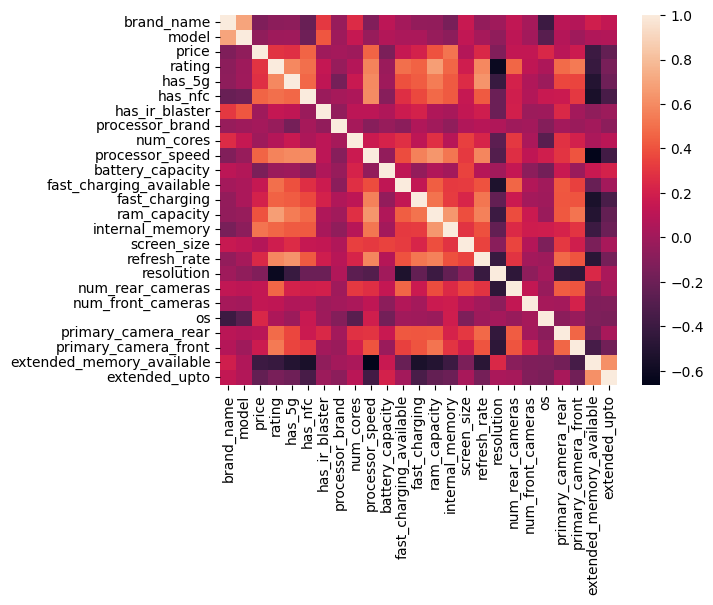

In [ ]:
#technique 1 for feature selection correlation analysis
sns.heatmap(data_label_encoded.corr())


In [ ]:

fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

feature  corr_coeff
0                       model   -0.062802
1                       price    1.000000
2                      rating    0.290656
3                      has_5g    0.273898
4                     has_nfc    0.455832
5              has_ir_blaster   -0.004398
6             processor_brand    0.013318
7                   num_cores   -0.010898
8             processor_speed    0.454490
9            battery_capacity   -0.139425
10    fast_charging_available    0.145491
11              fast_charging    0.210824
12               ram_capacity    0.396808
13            internal_memory    0.514956
14                screen_size    0.076785
15               refresh_rate    0.245425
16                 resolution   -0.122608
17           num_rear_cameras    0.131140
18          num_front_cameras    0.129884
19                         os    0.237860
20        primary_camera_rear    0.096013
21       primary_camera_front    0.174577
22  extended_memory_available   -0.400364
23              extended_upto   -0.236755

# Technique 2 - Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

feature  rf_importance
8             processor_speed       0.316559
16                 resolution       0.144479
13            internal_memory       0.076543
21       primary_camera_front       0.057326
14                screen_size       0.056831
1                       model       0.055739
2                      rating       0.048076
9            battery_capacity       0.038245
11              fast_charging       0.026070
3                      has_5g       0.025412
0                  brand_name       0.023114
20        primary_camera_rear       0.019093
6             processor_brand       0.019085
12               ram_capacity       0.017527
22  extended_memory_available       0.015870
4                     has_nfc       0.013999
23              extended_upto       0.013853
15               refresh_rate       0.011990
5              has_ir_blaster       0.006684
17           num_rear_cameras       0.004755
18          num_front_cameras       0.003472
7                   num_cores       0.003147
19                         os       0.001873
10    fast_charging_available       0.000257

# Technique 3 - Gradient Boosting Feature importances

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

feature  gb_importance
8             processor_speed       0.229586
16                 resolution       0.137643
9            battery_capacity       0.103864
14                screen_size       0.103825
13            internal_memory       0.097544
2                      rating       0.076910
1                       model       0.058624
4                     has_nfc       0.046837
21       primary_camera_front       0.041749
3                      has_5g       0.028778
11              fast_charging       0.015018
23              extended_upto       0.012788
12               ram_capacity       0.009766
15               refresh_rate       0.009158
17           num_rear_cameras       0.009026
0                  brand_name       0.008805
5              has_ir_blaster       0.003805
20        primary_camera_rear       0.003006
22  extended_memory_available       0.001364
19                         os       0.001204
6             processor_brand       0.000358
18          num_front_cameras       0.000340
10    fast_charging_available       0.000000
7                   num_cores       0.000000

# Technique 4 - Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

feature  permutation_importance
8             processor_speed                0.758214
13            internal_memory                0.115705
11              fast_charging                0.109957
2                      rating                0.052950
16                 resolution                0.030775
1                       model                0.024409
21       primary_camera_front                0.023612
15               refresh_rate                0.016784
23              extended_upto                0.011505
0                  brand_name                0.010601
22  extended_memory_available                0.010168
4                     has_nfc                0.008875
12               ram_capacity                0.006977
5              has_ir_blaster                0.002986
3                      has_5g                0.002353
19                         os                0.000781
7                   num_cores                0.000251
10    fast_charging_available                0.000179
20        primary_camera_rear                0.000154
6             processor_brand               -0.000878
14                screen_size               -0.008344
18          num_front_cameras               -0.009053
17           num_rear_cameras               -0.012396
9            battery_capacity               -0.015132

# Technique 5 - LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

feature   lasso_coeff
13            internal_memory  12567.617264
4                     has_nfc   8317.376379
8             processor_speed   6703.504631
12               ram_capacity   4102.754259
19                         os   4074.193474
6             processor_brand   2265.070163
20        primary_camera_rear   2125.158654
23              extended_upto   1884.639969
1                       model   1737.197576
0                  brand_name   1673.116988
17           num_rear_cameras   1669.115262
18          num_front_cameras    884.824487
16                 resolution   -518.394680
5              has_ir_blaster   -779.701580
3                      has_5g   -798.815808
7                   num_cores  -1075.379452
15               refresh_rate  -1138.424198
21       primary_camera_front  -2062.916099
9            battery_capacity  -2491.148650
10    fast_charging_available  -2567.893392
14                screen_size  -3123.920537
2                      rating  -3921.672243
11              fast_charging  -3948.741569
22  extended_memory_available  -5113.679546

# Technique 6 - RFE

In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

feature  rfe_score
8             processor_speed   0.307612
16                 resolution   0.169190
13            internal_memory   0.074812
1                       model   0.063277
21       primary_camera_front   0.053924
9            battery_capacity   0.052307
2                      rating   0.050904
14                screen_size   0.050537
0                  brand_name   0.028635
22  extended_memory_available   0.022523
11              fast_charging   0.018864
3                      has_5g   0.016894
12               ram_capacity   0.016479
15               refresh_rate   0.014335
4                     has_nfc   0.013880
6             processor_brand   0.011443
20        primary_camera_rear   0.010480
23              extended_upto   0.008283
17           num_rear_cameras   0.005770
5              has_ir_blaster   0.003335
19                         os   0.003330
18          num_front_cameras   0.002990
10    fast_charging_available   0.000107
7                   num_cores   0.000090

# Technique 7 - Linear Regression Weights

In [ ]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

feature    reg_coeffs
13            internal_memory  12567.621166
4                     has_nfc   8317.400625
8             processor_speed   6703.541280
12               ram_capacity   4102.803055
19                         os   4074.203613
6             processor_brand   2265.085738
20        primary_camera_rear   2125.202413
23              extended_upto   1884.678139
1                       model   1737.209840
0                  brand_name   1673.143494
17           num_rear_cameras   1669.138692
18          num_front_cameras    884.834281
16                 resolution   -518.443750
5              has_ir_blaster   -779.724536
3                      has_5g   -798.830816
7                   num_cores  -1075.410936
15               refresh_rate  -1138.440678
21       primary_camera_front  -2062.953214
9            battery_capacity  -2491.153409
10    fast_charging_available  -2567.925034
14                screen_size  -3123.942225
2                      rating  -3921.745644
11              fast_charging  -3948.765582
22  extended_memory_available  -5113.713659

# Technique 8 - SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.53027695e+02, -1.50654259e+03,  4.62548306e+03, ...,
        -2.03502445e+03,  2.34071958e+02, -3.94263135e+01],
       [ 1.52109256e+01, -1.90559242e+02,  1.61672168e+03, ...,
        -7.63971740e+02, -2.93320801e+02, -1.50742006e+01],
       [ 2.77297683e+00, -3.73239035e+02, -2.31337489e+03, ...,
         1.92398342e+03, -1.40210219e+02,  1.44063711e+02],
       ...,
       [-1.81498460e+01,  3.33771853e+01, -2.58375064e+03, ...,
         4.88787245e+02, -1.18006049e+02,  1.24568899e+02],
       [-3.68957941e+02, -1.41232073e+03,  2.20252954e+02, ...,
        -2.14815864e+03,  3.81822265e+02,  8.51768496e+01],
       [-9.88486220e+01,  9.08253815e+01, -8.51021054e+01, ...,
         3.01026257e+03, -1.33686627e+02,  9.09435968e+01]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

feature    SHAP_score
8             processor_speed  14944.225116
16                 resolution   3858.969307
13            internal_memory   2808.396656
2                      rating   2768.659718
21       primary_camera_front   1418.966668
14                screen_size   1248.880618
9            battery_capacity    913.202623
1                       model    834.748286
11              fast_charging    810.324206
3                      has_5g    653.528978
12               ram_capacity    642.789704
4                     has_nfc    423.942955
22  extended_memory_available    392.345648
20        primary_camera_rear    300.810910
15               refresh_rate    290.017971
0                  brand_name    264.396383
17           num_rear_cameras    254.165313
23              extended_upto    153.565681
6             processor_brand    146.854389
5              has_ir_blaster    103.004875
18          num_front_cameras     86.573795
10    fast_charging_available     62.067720
19                         os     43.702239
7                   num_cores     23.676093

In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [ ]:
final_fi_df

corr_coeff  rf_importance  gb_importance  \
feature                                                               
model                       -0.062802       0.055739       0.058624   
rating                       0.290656       0.048076       0.076910   
has_5g                       0.273898       0.025412       0.028778   
has_nfc                      0.455832       0.013999       0.046837   
has_ir_blaster              -0.004398       0.006684       0.003805   
processor_brand              0.013318       0.019085       0.000358   
num_cores                   -0.010898       0.003147       0.000000   
processor_speed              0.454490       0.316559       0.229586   
battery_capacity            -0.139425       0.038245       0.103864   
fast_charging_available      0.145491       0.000257       0.000000   
fast_charging                0.210824       0.026070       0.015018   
ram_capacity                 0.396808       0.017527       0.009766   
internal_memory              0.514956       0.076543       0.097544   
screen_size                  0.076785       0.056831       0.103825   
refresh_rate                 0.245425       0.011990       0.009158   
resolution                  -0.122608       0.144479       0.137643   
num_rear_cameras             0.131140       0.004755       0.009026   
num_front_cameras            0.129884       0.003472       0.000340   
os                           0.237860       0.001873       0.001204   
primary_camera_rear          0.096013       0.019093       0.003006   
primary_camera_front         0.174577       0.057326       0.041749   
extended_memory_available   -0.400364       0.015870       0.001364   
extended_upto               -0.236755       0.013853       0.012788   

                           permutation_importance   lasso_coeff  rfe_score  \
feature                                                                      
model                                    0.024409   1737.197576   0.063277   
rating                                   0.052950  -3921.672243   0.050904   
has_5g                                   0.002353   -798.815808   0.016894   
has_nfc                                  0.008875   8317.376379   0.013880   
has_ir_blaster                           0.002986   -779.701580   0.003335   
processor_brand                         -0.000878   2265.070163   0.011443   
num_cores                                0.000251  -1075.379452   0.000090   
processor_speed                          0.758214   6703.504631   0.307612   
battery_capacity                        -0.015132  -2491.148650   0.052307   
fast_charging_available                  0.000179  -2567.893392   0.000107   
fast_charging                            0.109957  -3948.741569   0.018864   
ram_capacity                             0.006977   4102.754259   0.016479   
internal_memory                          0.115705  12567.617264   0.074812   
screen_size                             -0.008344  -3123.920537   0.050537   
refresh_rate                             0.016784  -1138.424198   0.014335   
resolution                               0.030775   -518.394680   0.169190   
num_rear_cameras                        -0.012396   1669.115262   0.005770   
num_front_cameras                       -0.009053    884.824487   0.002990   
os                                       0.000781   4074.193474   0.003330   
primary_camera_rear                      0.000154   2125.158654   0.010480   
primary_camera_front                     0.023612  -2062.916099   0.053924   
extended_memory_available                0.010168  -5113.679546   0.022523   
extended_upto                            0.011505   1884.639969   0.008283   

                             reg_coeffs    SHAP_score  
feature                                                
model                       1737.209840    834.748286  
rating                     -3921.745644   2768.659718  
has_5g                      -798.830816    653.528978  
has_nfc             

In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
processor_speed              0.398640
resolution                   0.120889
internal_memory              0.088147
rating                       0.061894
screen_size                  0.049041
model                        0.045617
primary_camera_front         0.043992
battery_capacity             0.042385
fast_charging                0.036583
has_nfc                      0.019299
has_5g                       0.018843
ram_capacity                 0.014060
extended_memory_available    0.012325
refresh_rate                 0.011970
extended_upto                0.010082
primary_camera_rear          0.008514
processor_brand              0.007065
has_ir_blaster               0.003972
num_rear_cameras             0.003322
os                           0.001713
num_cores                    0.000850
fast_charging_available      0.000480
num_front_cameras            0.000316
dtype: float64

In [ ]:
#X_label

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=135, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=12, scoring='r2')

In [ ]:
scores.mean()

0.6267946258633171

In [ ]:
rf = RandomForestRegressor(n_estimators=135, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['num_front_cameras', 'fast_charging_available',"num_cores"]), y_label, cv=12, scoring='r2')

In [ ]:
scores.mean()

0.6267946258633171

In [ ]:
export_df = X_label.drop(columns=['num_front_cameras', 'fast_charging_available',"num_cores"])
export_df['price'] = y_label

In [ ]:
export_df.to_csv('smartphones for ml.csv', index=False)

In [ ]:
export_df

brand_name  model  rating  has_5g  has_nfc  has_ir_blaster  \
0          27.0  267.0    89.0    True     True           False   
1          27.0  286.0    81.0    True    False           False   
2          33.0  480.0    75.0    True    False           False   
3          23.0  161.0    81.0    True    False           False   
4          31.0  370.0    82.0    True    False           False   
5          33.0  519.0    80.0    True     True           False   
6           0.0   13.0    81.0    True     True           False   
7          40.0  848.0    86.0    True    False            True   
8          25.0  187.0    85.0    True     True           False   
9          27.0  282.0    84.0    True     True           False   
10         31.0  368.0    82.0    True    False           False   
11         28.0  305.0    79.0    True     True           False   
12         40.0  846.0    79.0    True    False            True   
13         39.0  629.0    80.0    True    False           False   
14         33.0  573.0    80.0    True     True           False   
15          0.0    3.0    79.0    True     True           False   
16         39.0  693.0    65.0   False    False           False   
17         28.0  251.0    86.0    True     True           False   
18         27.0  261.0    86.0    True     True           False   
19         39.0  703.0    72.0   False    False           False   
20         27.0  269.0    85.0    True     True           False   
21         39.0  661.0    85.0    True    False           False   
22         30.0  360.0    80.0    True    False            True   
23         40.0  838.0    76.0    True    False            True   
24         39.0  663.0    87.0    True     True           False   
25         33.0  554.0    88.0    True     True           False   
26         27.0  287.0    84.0    True    False           False   
27         39.0  659.0    83.0    True    False           False   
28         27.0  268.0    80.0    True     True           False   
29         31.0  369.0    84.0    True    False           False   
30         30.0  364.0    81.0    True     True            True   
31         39.0  664.0    83.0    True    False           False   
32          0.0    0.0    73.0   False     True           False   
33         33.0  540.0    85.0    True    False           False   
34         33.0  559.0    87.0    True     True           False   
35         28.0  321.0    87.0    True     True           False   
36         33.0  568.0    80.0    True     True           False   
37         40.0  847.0    83.0    True    False            True   
38         28.0  249.0    83.0    True     True           False   
39         27.0  289.0    83.0    True     True           False   
40         40.0  825.0    83.0    True    False            True   
41         23.0  123.0    87.0    True     True           False   
42         31.0  371.0    85.0    True    False           False   
43         39.0  710.0    80.0   False    False           False   
44         33.0  537.0    81.0    True     True           False   
45         40.0  818.0    76.0   False    False            True   
46         31.0  417.0    64.0   False    False           False   
47         39.0  695.0    68.0   False    False           False   
48         33.0  507.0    80.0    True     True           False   
49         33.0  481.0    79.0    True    False           False   
50         12.0  879.0    82.0    True     True            True   
51         14.0  104.0    64.0    True    False           False   
52         23.0  167.0    83.0    True     True           False   
53         31.0  365.0    74.0   False    False           False   
54         31.0  400.0    75.0    True    False           False   
55          0.0   16.0    82.0    True     True           False   
56         40.0  813.0    78.0   False    False            True   
57         33.0  572.0    89.0    True     True           False   
58         23.0  151.0    75.0   False    False     

# model selection


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA

In [ ]:
df2=pd.read_csv("/content/smartphones for ml.csv")

In [ ]:
df2.head()

brand_name  model  rating  has_5g  has_nfc  has_ir_blaster  \
0        27.0  267.0    89.0    True     True           False   
1        27.0  286.0    81.0    True    False           False   
2        33.0  480.0    75.0    True    False           False   
3        23.0  161.0    81.0    True    False           False   
4        31.0  370.0    82.0    True    False           False   

   processor_brand  processor_speed  battery_capacity  fast_charging  \
0              9.0              3.2            5000.0          100.0   
1              9.0              2.2            5000.0           33.0   
2              2.0              2.4            5000.0           15.0   
3              9.0              2.2            5000.0           33.0   
4              1.0              2.6            5000.0           67.0   

   ram_capacity  internal_memory  screen_size  refresh_rate  resolution  \
0          12.0            256.0         6.70           120        39.0   
1           6.0            128.0         6.59           120        11.0   
2           4.0             64.0         6.60            90        10.0   
3           6.0            128.0         6.55           120         8.0   
4           6.0            128.0         6.70           120        11.0   

   num_rear_cameras   os  primary_camera_rear  primary_camera_front  \
0                 3  0.0                 50.0                  16.0   
1                 3  0.0                 64.0                  16.0   
2                 3  0.0                 50.0                  13.0   
3                 3  0.0                 50.0                  16.0   
4                 3  0.0                108.0                  16.0   

   extended_memory_available  extended_upto  price  
0                          0            0.0  54999  
1                          1         1024.0  19989  
2                          1         1024.0  16499  
3                          1         1024.0  14999  
4                          0            0.0  24999

<ipython-input-287-29ed1834896a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df2["price"]))


<Axes: xlabel='price', ylabel='Density'>

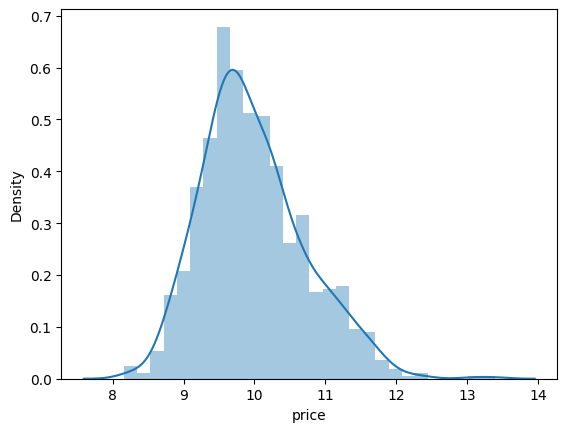

In [ ]:
sns.distplot(np.log(df2["price"]))

In [ ]:
df.drop(columns=['num_front_cameras', 'fast_charging_available',"num_cores"],inplace=True)